In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

### 1. Изучение структуры данных.
Загружаем датасет и устанавливаем колонку с датой в качестве индекса

In [4]:
df = pd.read_csv('data.csv', delimiter=';')
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)
df.head()

,open,close,high,low,volume,company
time,,,,,,
2006-07-19 00:00:00+00:00,203.25,203.50,204.30,200.20,61148110,ROSN
2006-07-20 00:00:00+00:00,204.35,203.75,204.45,203.15,11412880,ROSN
2006-07-21 00:00:00+00:00,203.50,201.85,203.65,200.30,18641060,ROSN
2006-07-24 00:00:00+00:00,202.40,202.00,202.40,201.30,7941520,ROSN
2006-07-25 00:00:00+00:00,203.30,202.60,203.75,202.00,16748340,ROSN


Информация о датасете

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28889 entries, 2006-07-19 00:00:00+00:00 to 2024-10-24 00:00:00+00:00
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   open     28889 non-null  float64
 1   close    28889 non-null  float64
 2   high     28889 non-null  float64
 3   low      28889 non-null  float64
 4   volume   28889 non-null  int64  
 5   company  28889 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 1.5+ MB


Описание числовых характеристик

In [216]:
df.describe()

,open,close,high,low,volume
count,28889.000000,28889.000000,28889.000000,28889.000000,2.888900e+04
mean,808.259461,808.200599,818.179511,797.415978,1.086280e+07
std,1374.247049,1374.232704,1389.169619,1357.565566,3.258655e+07
min,8.950000,8.610000,9.400000,8.510000,1.000000e+03
25%,138.000000,138.100000,139.980000,136.200000,5.667100e+05
50%,248.990000,248.750000,251.850000,245.550000,1.565940e+06
75%,686.300000,686.300000,694.600000,676.800000,3.935752e+06
max,8152.500000,8152.000000,8175.000000,8080.000000,5.598712e+08


Колонки:
- open - цена открытия
- close - цена закрытия
- high - максимальная цена
- low - минимальная цена
- volume - объем торгов
- time - время торгов
- company - тикер компании

Тикеры:
- ROSN - Роснефть
- GAZP - Газпром
- LKOH - Лукойл
- NVTK - Новатэк
- SNGS - Сургутнефтегаз
- TATN - Татнефть

Проверка количества пропусков в каждом столбце

In [217]:
df.isnull().sum()

open       0
close      0
high       0
low        0
volume     0
company    0
dtype: int64

Создаем отдельные датафреймы для каждого тикера для удобства использования

In [5]:
tickers = ['ROSN', 'GAZP', 'LKOH', 'NVTK', 'SNGS', 'TATN']

ROSN = df[df['company'] == 'ROSN'].drop(columns=['company'])
GAZP = df[df['company'] == 'GAZP'].drop(columns=['company'])
LKOH = df[df['company'] == 'LKOH'].drop(columns=['company'])
NVTK = df[df['company'] == 'NVTK'].drop(columns=['company'])
SNGS = df[df['company'] == 'SNGS'].drop(columns=['company'])
TATN = df[df['company'] == 'TATN'].drop(columns=['company'])


In [6]:
dataframes = {ticker: eval(ticker) for ticker in tickers}
ma_day = [50, 100, 300]


ma_columns = [f"MA_{ma}d" for ma in ma_day]

for ticker, df in dataframes.items():
    dataframes[ticker] = df.drop(columns=ma_columns, errors='ignore')

ROSN, GAZP, LKOH, NVTK, SNGS, TATN = [dataframes[ticker] for ticker in tickers]

Отобразим цены закрытий акций Лукойла за весь период

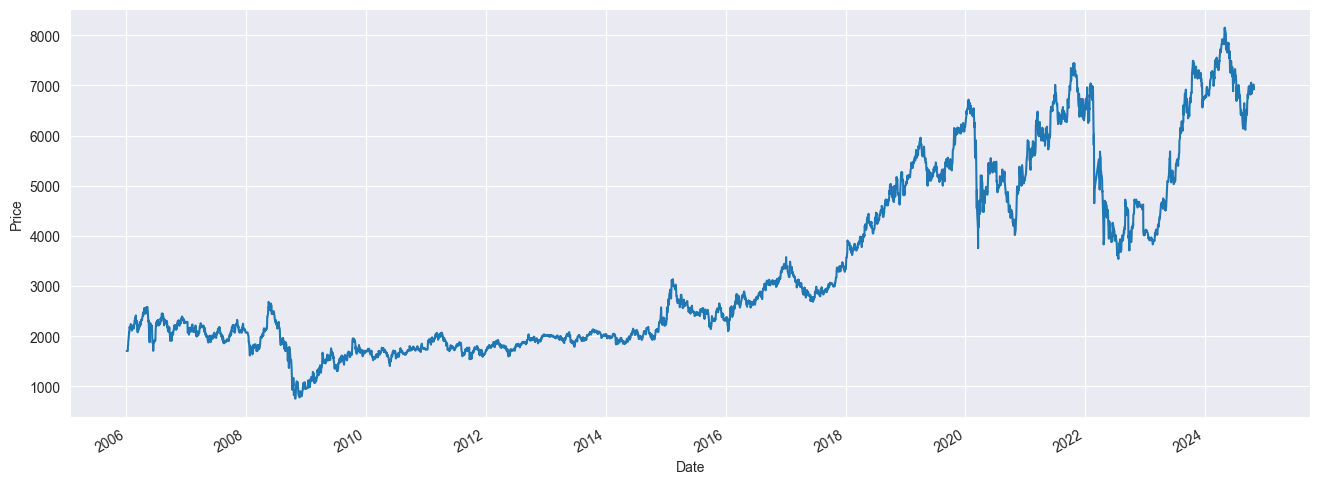

In [220]:
LKOH['close'].plot(figsize = (16, 6))
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

Отобразим объем торгов за день акций Лукойла за весь период

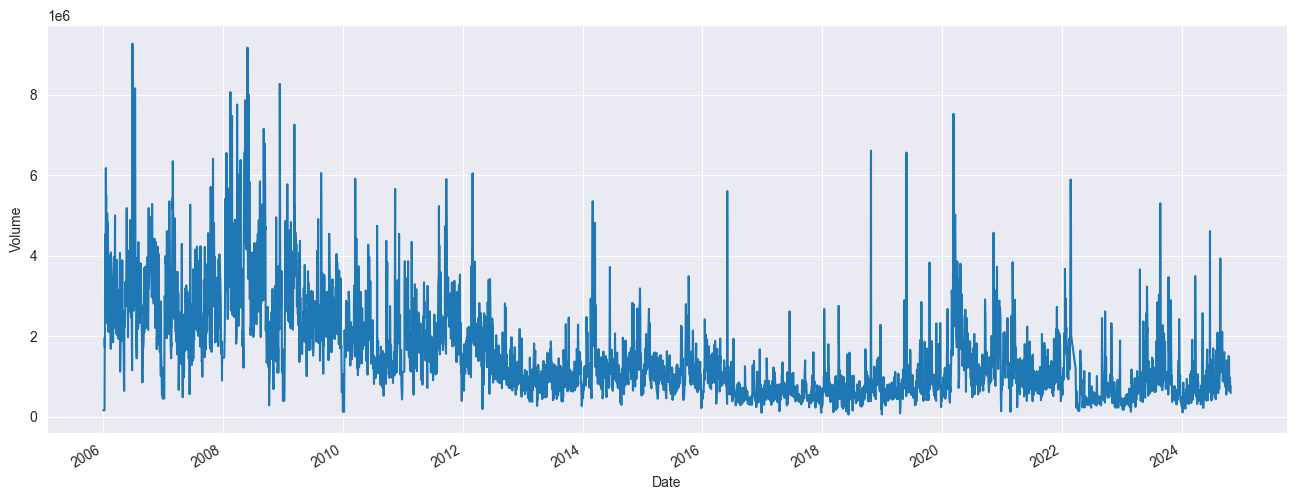

In [221]:
LKOH['volume'].plot(figsize=(16,6))
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()

Построим график со скользящими средними за 10, 50 и 100 дней и ценой акции при закрытии торгов

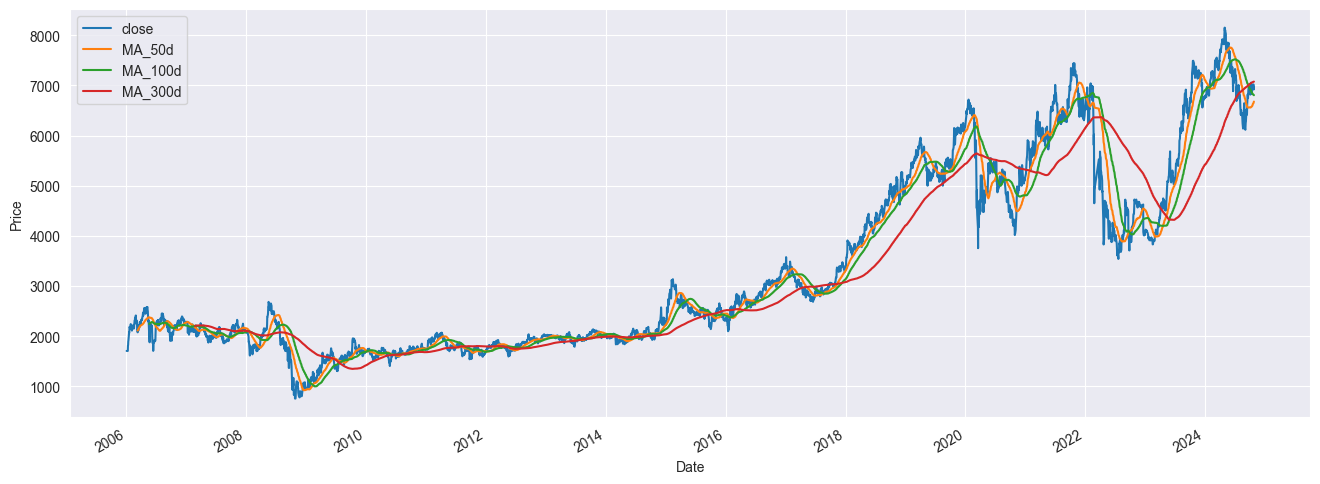

In [222]:
ma_columns = [f"MA_{ma}d" for ma in ma_day]

for ma in ma_day:
    column_name = f"MA_{str(ma)}d"
    LKOH[column_name] = pd.DataFrame.rolling(LKOH['close'], ma).mean()

LKOH[['close'] + ma_columns].plot(figsize=(16, 6))
LKOH.drop(columns=ma_columns, inplace=True)
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

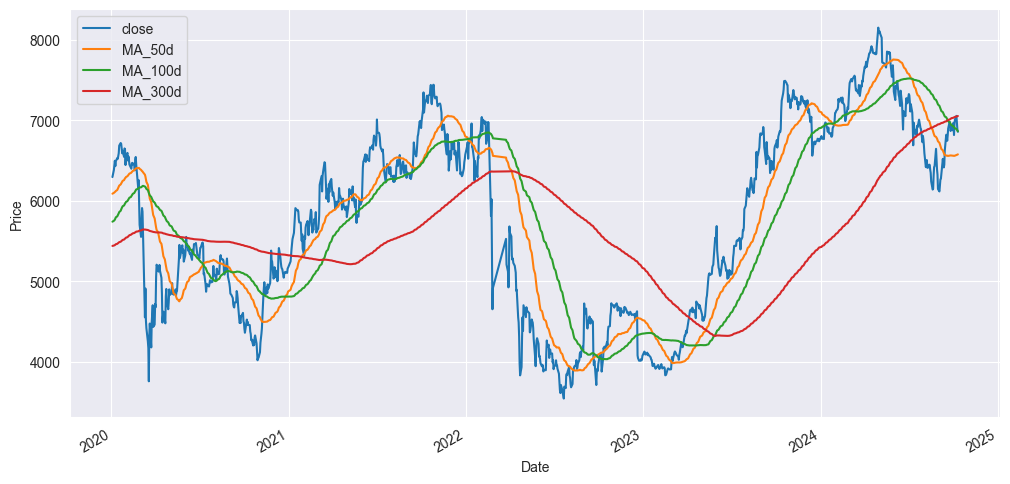

In [223]:
start_date = '2020-01-01'
end_date = '2024-10-10'

filtered_data = LKOH.copy()

for ma in ma_day:
    column_name = f"MA_{str(ma)}d"
    filtered_data[column_name] = filtered_data['close'].rolling(ma).mean()

filtered_data = filtered_data.loc[start_date:end_date]

filtered_data[['close'] + ma_columns].plot(figsize=(12, 6))
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

Добавим информацию о стоимости нефти марки BRENT

In [224]:
brent_data = pd.read_csv('brent_data.csv')
brent_data['time'] = pd.to_datetime(brent_data['time'])
brent_data.set_index('time', inplace=True)
brent_data.head()

,brent_price
time,
2007-07-30 00:00:00+00:00,75.739998
2007-07-31 00:00:00+00:00,77.050003
2007-08-01 00:00:00+00:00,75.349998
2007-08-02 00:00:00+00:00,75.760002
2007-08-03 00:00:00+00:00,74.750000


In [225]:
# brent_data.rename(columns={'brent_price':'close'}, inplace=True)
# brent_data.head()

In [226]:
merged_data = LKOH.join(brent_data[['brent_price']], how='left')

ma_day = [10, 50, 100]
for ma in ma_day:
    column_name = f"MA for {ma} days"
    merged_data[column_name] = merged_data['close'].rolling(window=ma).mean()

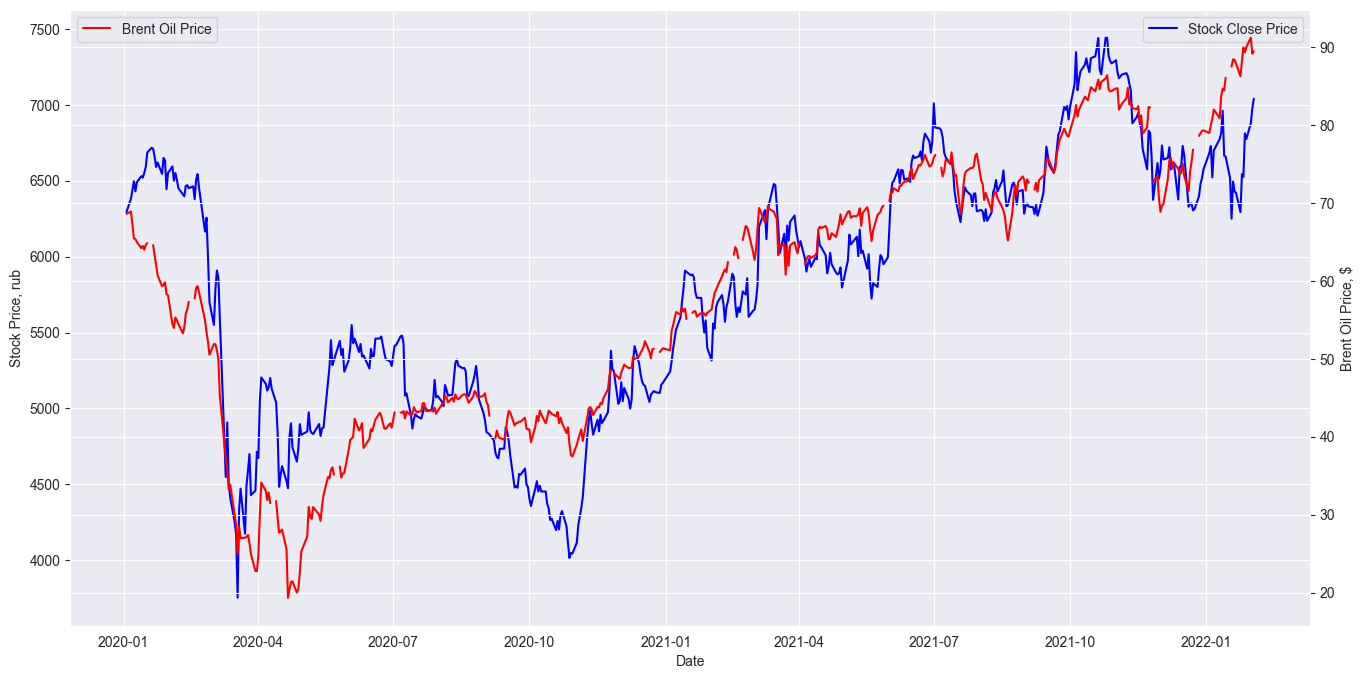

In [227]:
start_date = '2020-01-01'
end_date = '2022-02-02'
merged_data_new = merged_data.loc[start_date:end_date]

fig, ax1 = plt.subplots(figsize=(16, 8))


ax1.plot(merged_data_new.index, merged_data_new['close'], label='Stock Close Price', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price, rub')
ax1.tick_params(axis='y')
ax1.legend()

ax2 = ax1.twinx()
ax2.plot(merged_data_new.index, merged_data_new['brent_price'], label='Brent Oil Price', color='red')
ax2.set_ylabel('Brent Oil Price, $')
ax2.tick_params(axis='y')
ax2.legend()

plt.show()

Посчитаем корреляцию цены нефти и стоимости акции Лукойл за весь период

In [228]:
corr = merged_data[['close', 'brent_price']].corr(method='spearman')
corr

,close,brent_price
close,1.000000,-0.285314
brent_price,-0.285314,1.000000


Посчитаем корреляцию цены нефти и стоимости акции Лукойл в период с 2020-01-01 по 2022-02-02'

In [229]:
start_date = '2020-01-01'
end_date = '2022-02-02'
merged_data_new = merged_data.loc[start_date:end_date]

corr = merged_data_new[['close', 'brent_price']].corr(method='spearman')
corr

,close,brent_price
close,1.000000,0.903719
brent_price,0.903719,1.000000


Можно заметить, что за весь период стоимость нефти Brent слабо коррелирует с ценой акции Лукойла, но в определенные моменты это значение достаточно высоко, на такие временные промежутки стоит обратить внимание при создание модели

Выведем даты с самым большим изменением цены акции за день. В будущем на эти даты стоит обратить внимание при построение модели. Также стоит добавить в данные даты назначения диведендов, тк цены акций в эти дни сильно меняются.

In [230]:
daily_change = LKOH.copy()
daily_change['daily_change'] = daily_change['close'] - daily_change['open']

top_daily_changes = daily_change.reindex(daily_change['daily_change'].abs().nlargest(15).index)

top_daily_changes = top_daily_changes.reset_index()
top_daily_changes['time'] = pd.to_datetime(top_daily_changes['time'])
top_daily_changes.set_index('time', inplace=True)
top_daily_changes[['daily_change']].head(10)

,daily_change
time,
2022-02-24 00:00:00+00:00,-760.5
2022-02-21 00:00:00+00:00,-670.0
2022-03-31 00:00:00+00:00,560.0
2022-02-25 00:00:00+00:00,515.0
2020-03-19 00:00:00+00:00,503.0
2020-03-10 00:00:00+00:00,-484.0
2022-09-01 00:00:00+00:00,472.0
2022-09-20 00:00:00+00:00,-423.0
2020-04-22 00:00:00+00:00,394.0


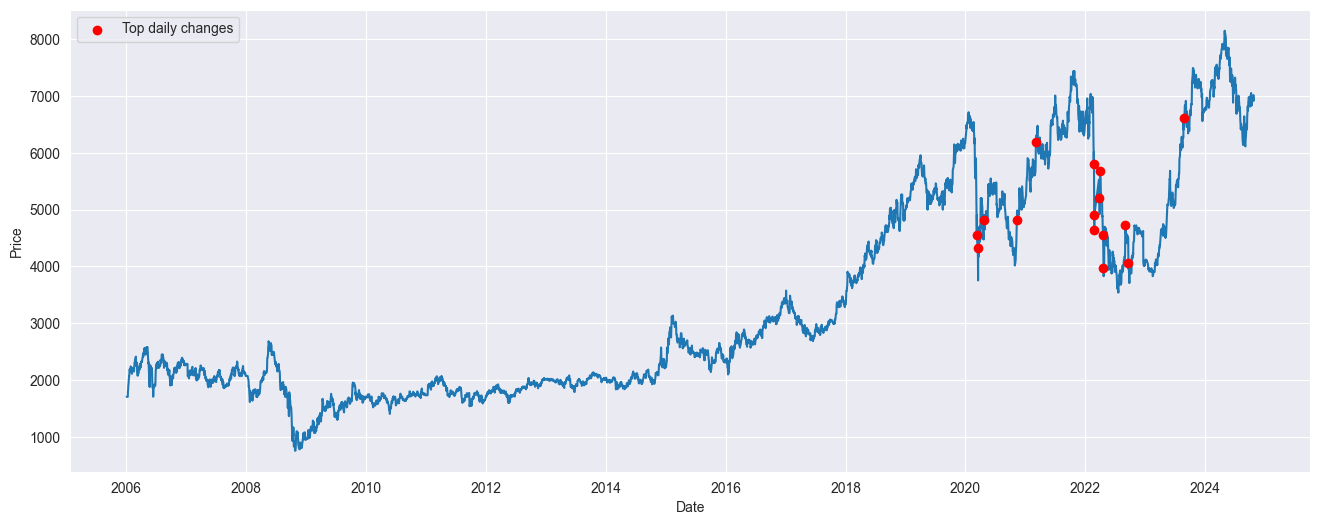

In [231]:
plt.figure(figsize=(16, 6))
plt.plot(LKOH.index, LKOH['close'])
plt.scatter(top_daily_changes.index, top_daily_changes['close'], color='red', label='Top daily changes', zorder=2)

plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Создадим датафрейм с относительными изменениями по сравнению с предыдущей строкой

In [232]:
# Список тикеров и соответствующих датафреймов
tickers_dict = {
    'ROSN': ROSN,
    'GAZP': GAZP,
    'LKOH': LKOH,
    'NVTK': NVTK,
    'SNGS': SNGS,
    'TATN': TATN,
    'BRENT': brent_data.rename(columns={'brent_price':'close'})
}

closing_df = pd.concat([pd.DataFrame(df['close']).rename(columns={'close': ticker}) for ticker, df in tickers_dict.items()], axis=1)

start_date = '2007-07-30'
end_date = '2024-10-10'
closing_df = closing_df.loc[start_date:end_date]

closing_df.head(10)

,ROSN,GAZP,LKOH,NVTK,SNGS,TATN,BRENT
time,,,,,,,
2007-07-30 00:00:00+00:00,209.80,272.06,2034.5,138.8,29.23,126.7,75.739998
2007-07-31 00:00:00+00:00,213.35,275.13,2054.5,139.0,29.17,127.4,77.050003
2007-08-01 00:00:00+00:00,207.90,270.14,1997.0,136.6,28.63,125.0,75.349998
2007-08-02 00:00:00+00:00,209.75,273.26,2008.0,136.4,28.85,126.4,75.760002
2007-08-03 00:00:00+00:00,209.55,277.08,2021.0,135.8,28.58,127.4,74.750000
2007-08-06 00:00:00+00:00,207.60,271.73,1980.0,133.4,28.50,125.1,71.169998
2007-08-07 00:00:00+00:00,208.50,272.74,1969.5,134.6,28.37,124.5,71.800003
2007-08-08 00:00:00+00:00,211.95,279.81,2016.5,137.0,29.36,127.9,70.989998
2007-08-09 00:00:00+00:00,207.35,271.59,1960.5,133.0,28.53,123.8,70.209999


In [233]:
tech_returns = closing_df.pct_change()
tech_returns = tech_returns.dropna()
tech_returns

,ROSN,GAZP,LKOH,NVTK,SNGS,TATN,BRENT
time,,,,,,,
2007-07-31 00:00:00+00:00,0.016921,0.011284,0.009830,0.001441,-0.002053,0.005525,0.017296
2007-08-01 00:00:00+00:00,-0.025545,-0.018137,-0.027987,-0.017266,-0.018512,-0.018838,-0.022064
2007-08-02 00:00:00+00:00,0.008899,0.011550,0.005508,-0.001464,0.007684,0.011200,0.005441
2007-08-03 00:00:00+00:00,-0.000954,0.013979,0.006474,-0.004399,-0.009359,0.007911,-0.013332
2007-08-06 00:00:00+00:00,-0.009306,-0.019309,-0.020287,-0.017673,-0.002799,-0.018053,-0.047893
...,...,...,...,...,...,...,...
2024-10-04 00:00:00+00:00,0.003800,-0.004108,0.007619,0.006240,-0.002720,0.015562,0.005540
2024-10-07 00:00:00+00:00,0.003188,0.001350,0.006563,-0.006201,0.022794,0.004248,0.036899
2024-10-08 00:00:00+00:00,-0.003376,0.002472,-0.011552,-0.007850,-0.006857,-0.059375,-0.046336


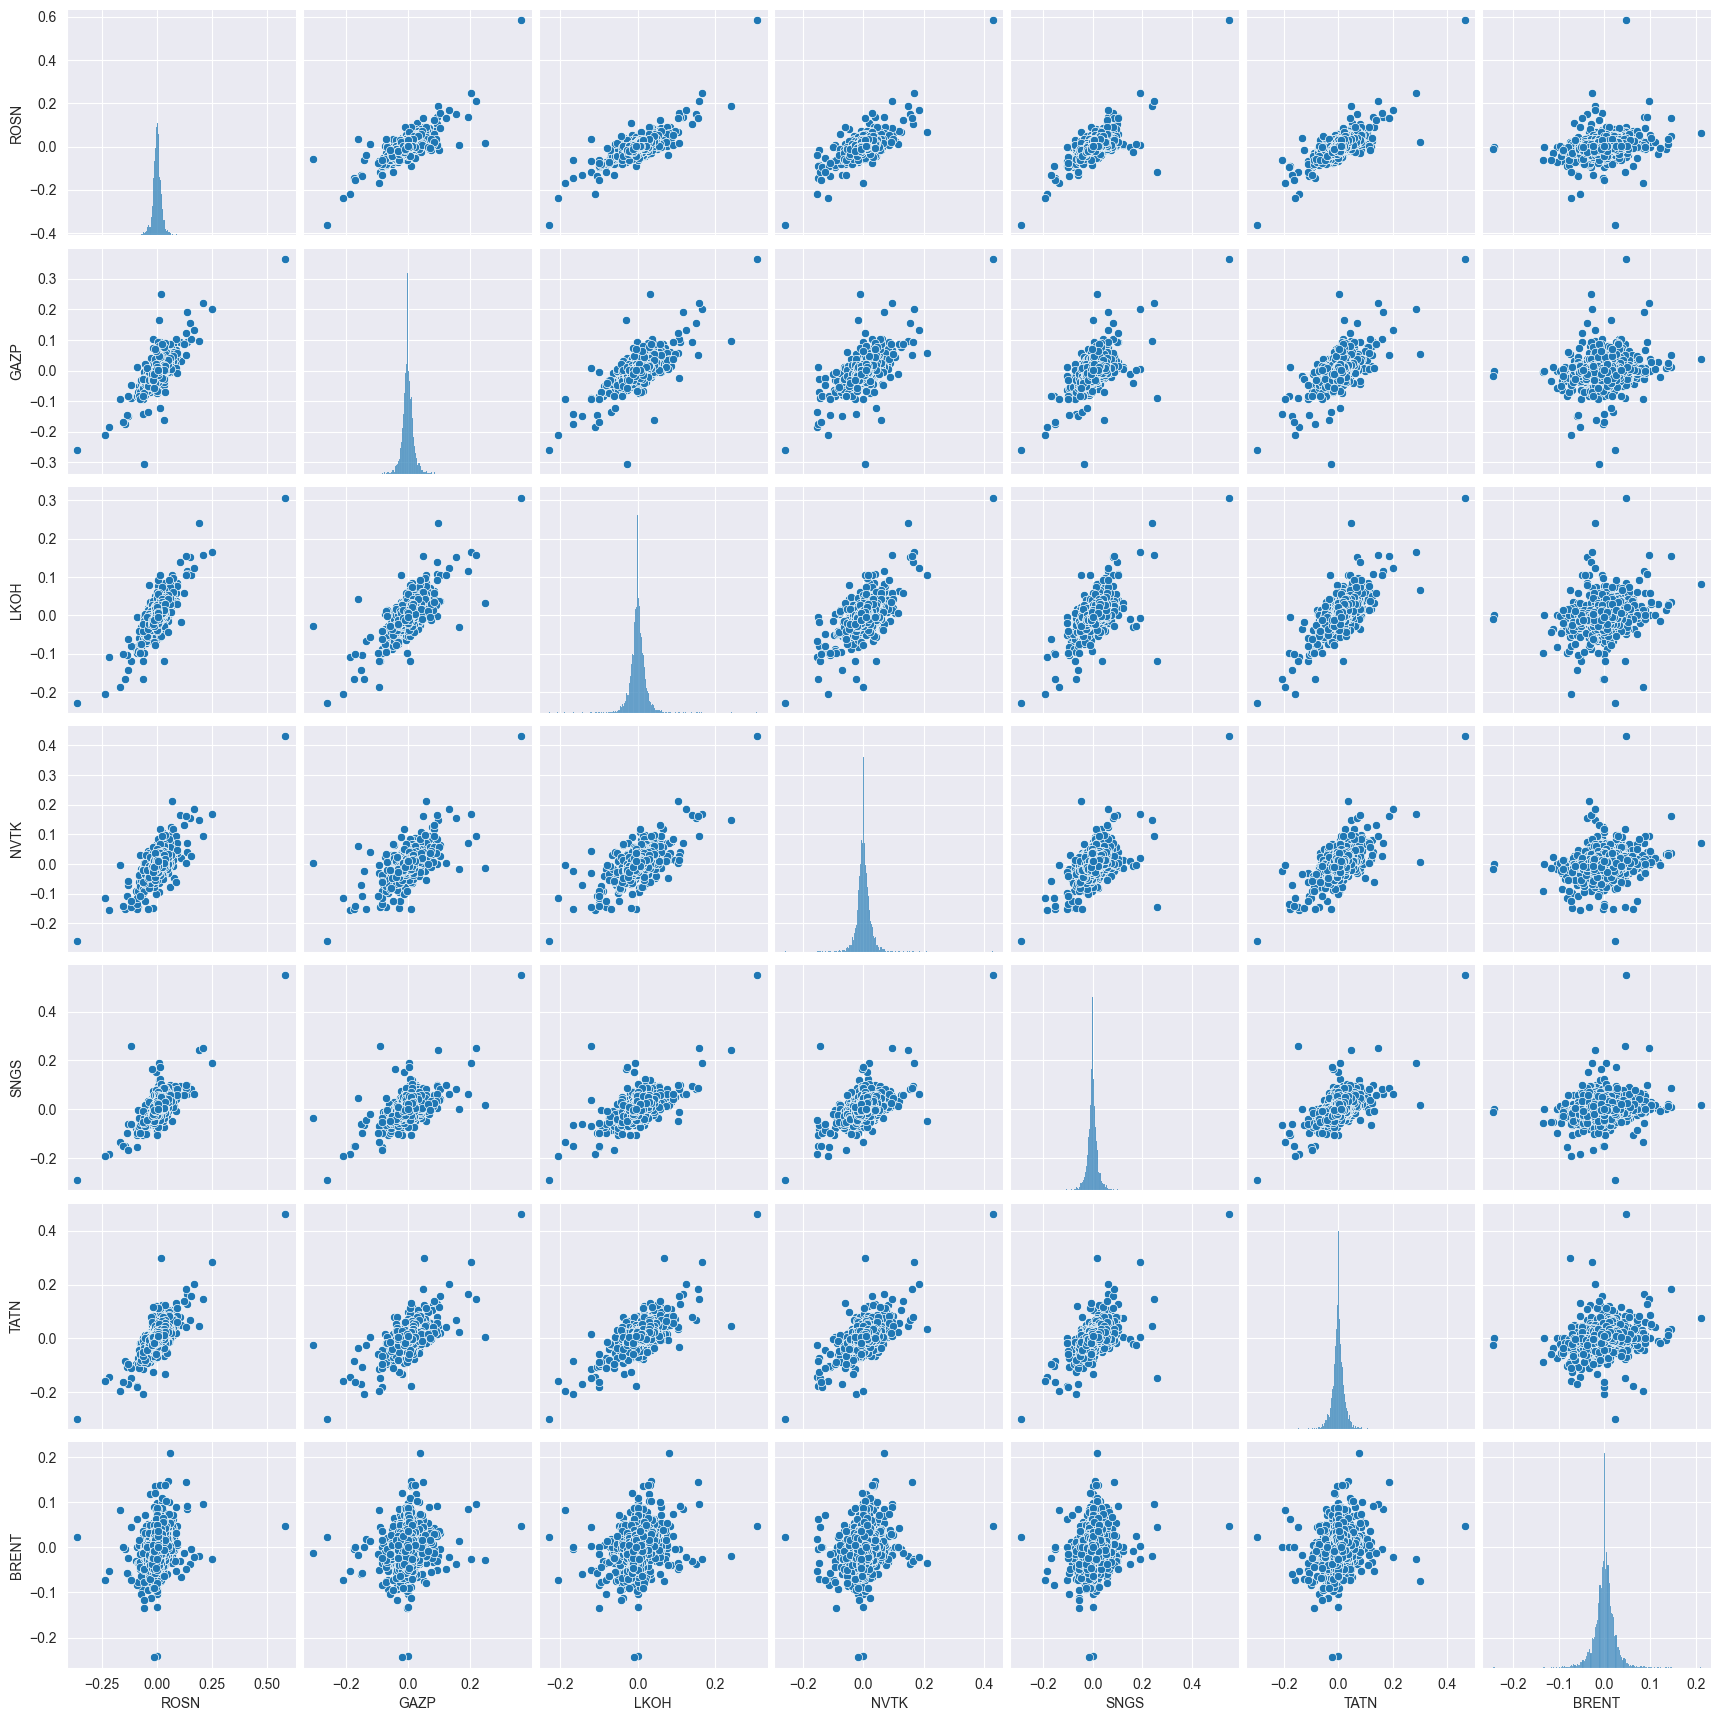

In [234]:
sns.pairplot(tech_returns.dropna())
plt.show()

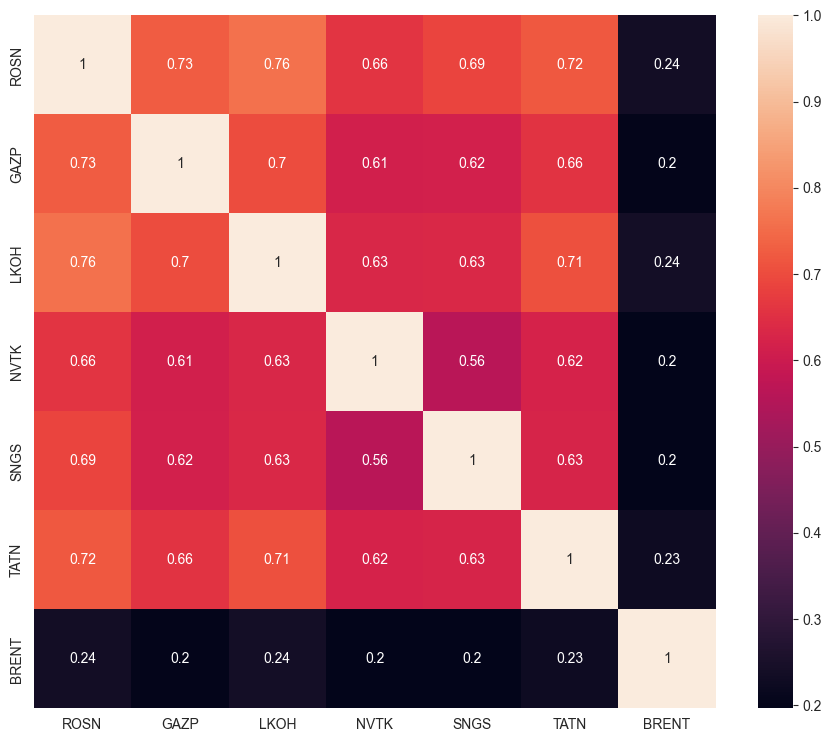

In [235]:
_, ax = plt.subplots(figsize=(11, 9))

corr = tech_returns.dropna().corr()

sns.heatmap(corr, annot = True)
plt.show()


### Выводы по корреляционной тепловой карте
- Акции крупных нефтегазовых компаний (ROSN, GAZP, LKOH, TATN) имеют высокую корреляцию между собой, указывая на схожие рыночные факторы.
- Корреляция акций с нефтью Brent низкая

Построение графиков цен закрытия и скользящих средних для каждого тикера в период с 2020-01-01 по 2024-10-10

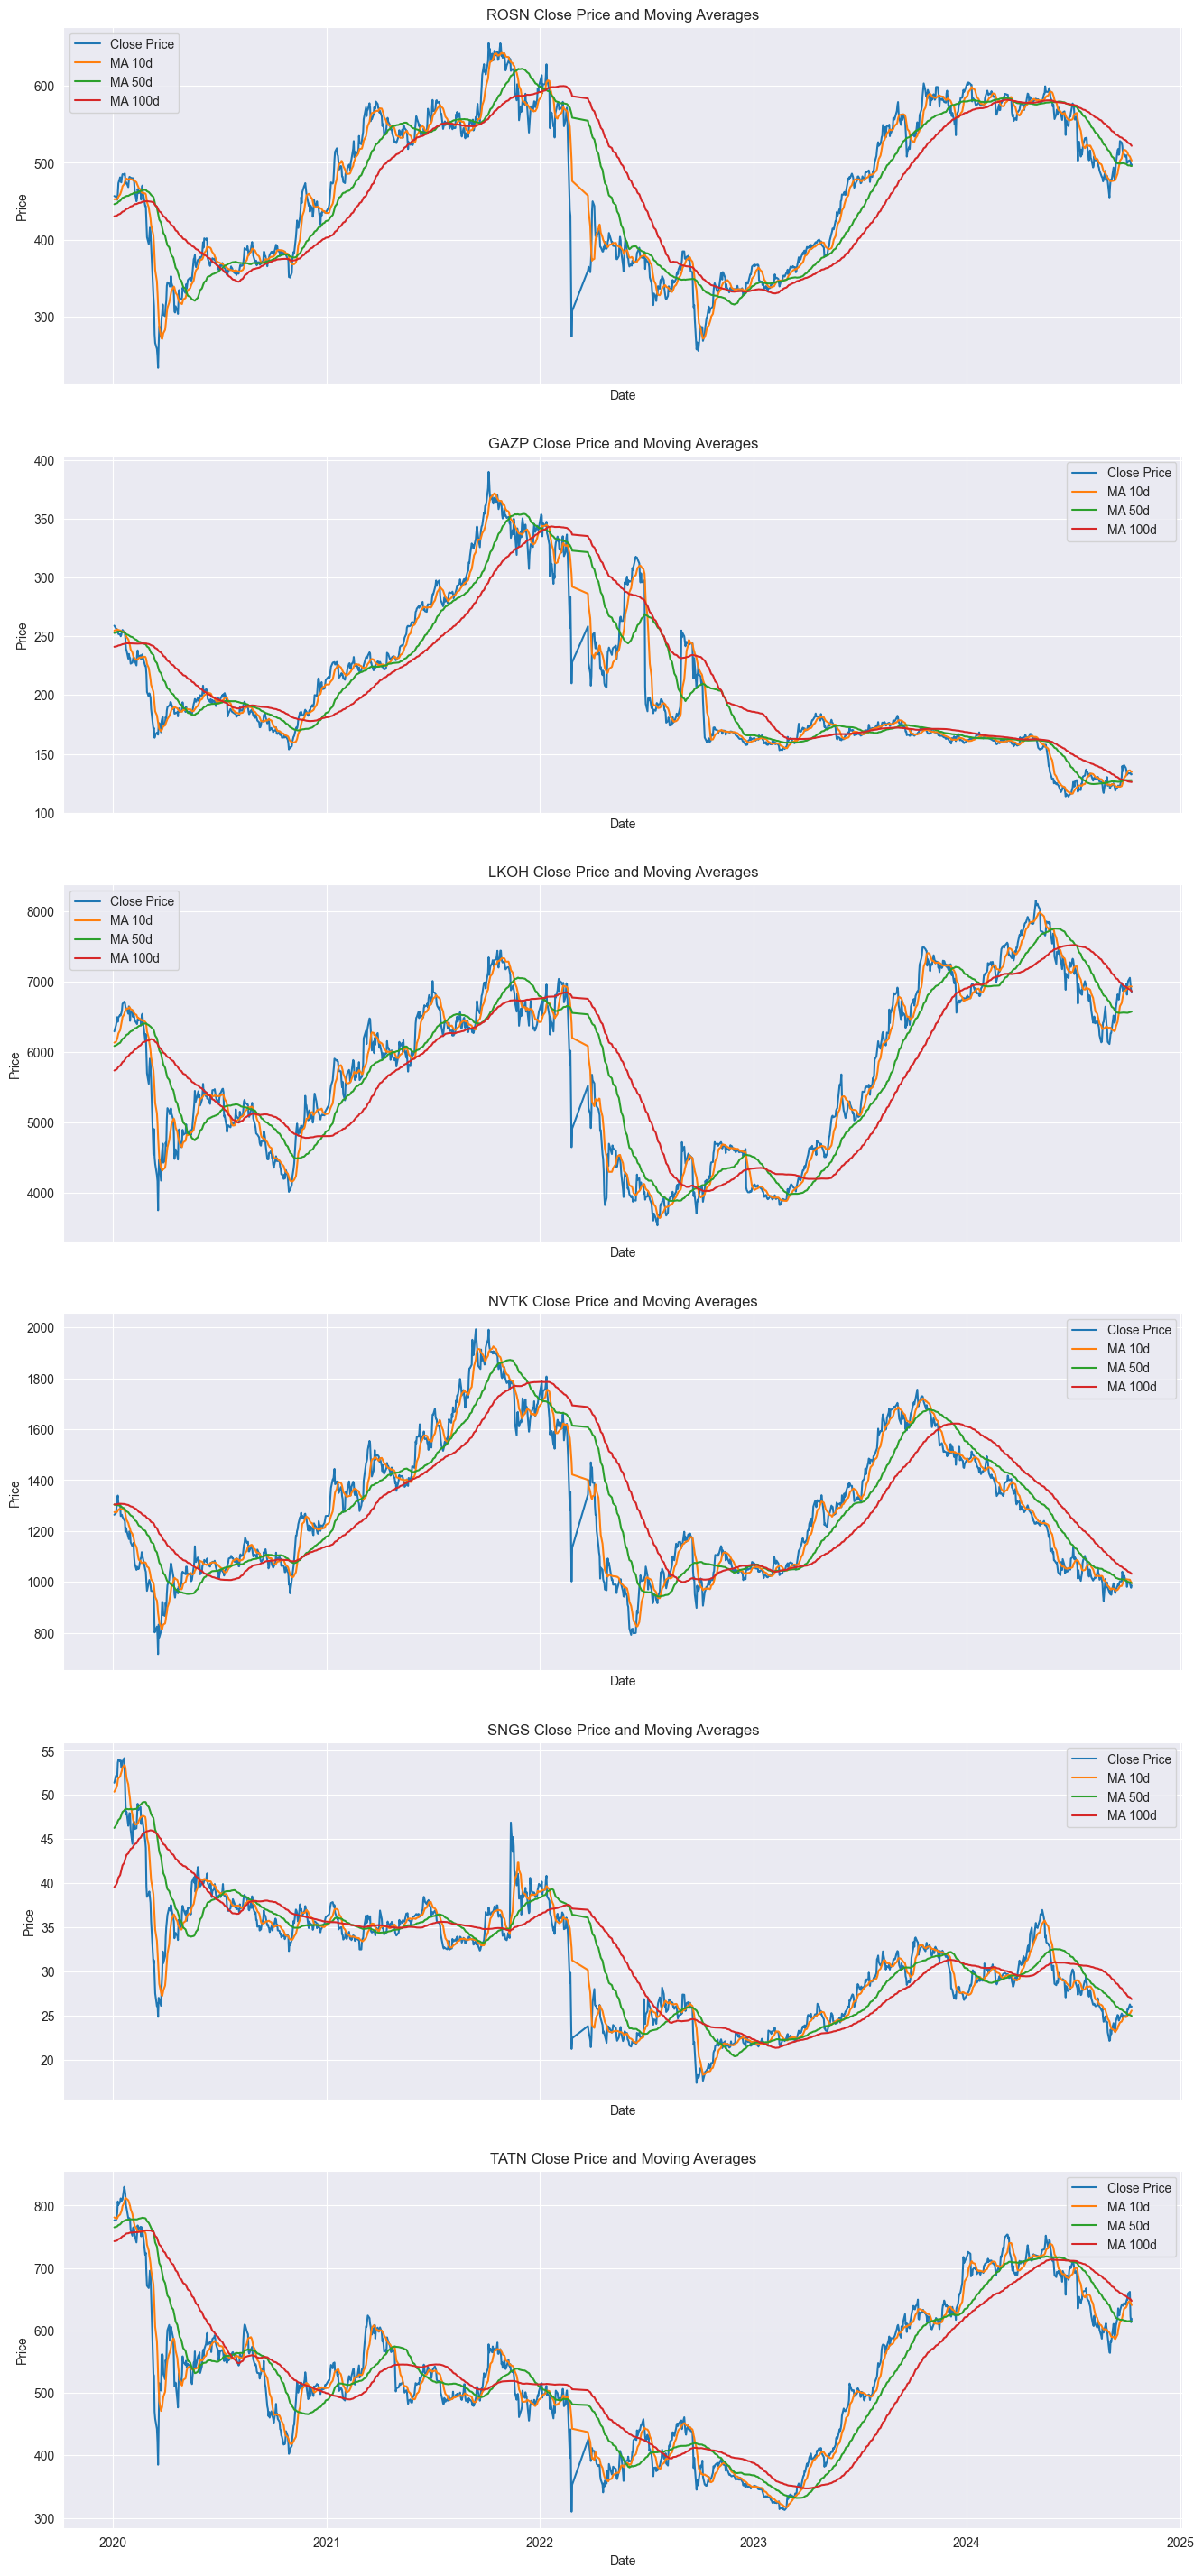

In [236]:
start_date = '2020-01-01'
end_date = '2024-10-10'

dataframes = {ticker: globals()[ticker] for ticker in tickers if ticker in globals()}

_, axes = plt.subplots(len(dataframes), 1, figsize=(16, 6 * len(dataframes)), sharex=True)

for i, (ticker, df) in enumerate(dataframes.items()):
    ma_day = [10, 50, 100]
    for ma in ma_day:
        column_name = f"MA_{str(ma)}d"
        df[column_name] = df['close'].rolling(ma).mean()

    df = df.loc[start_date:end_date]
    axes[i].plot(df.index, df['close'], label='Close Price')
    for ma in ma_day:
        axes[i].plot(df.index, df[f'MA_{ma}d'], label=f'MA {ma}d')

    axes[i].set_title(f"{ticker} Close Price and Moving Averages")
    axes[i].set_xlabel("Date")
    axes[i].set_ylabel("Price")
    axes[i].legend()

plt.show()


In [237]:
stats_summary = {}

for ticker, df in dataframes.items():
    stats = {
        'mean': df['close'].mean(),
        'median': df['close'].median(),
        'std_dev': df['close'].std(),
        'min': df['close'].min(),
        'max': df['close'].max()
    }
    stats_summary[ticker] = stats

stats_summary_df = pd.DataFrame(stats_summary).T
stats_summary_df.columns = ['Mean', 'Median', 'Std Dev', 'Min', 'Max']

print(stats_summary_df)


             Mean    Median      Std Dev     Min      Max
ROSN   316.034231   263.500   122.835597   82.95   655.25
GAZP   186.647228   163.995    61.040032   87.94   389.82
LKOH  3309.311093  2465.000  1803.468832  755.00  8152.00
NVTK   651.732411   503.800   477.217006   45.80  1993.00
SNGS    29.654560    28.740     5.836383    8.61    54.17
TATN   339.461558   294.600   213.114049   27.50   837.00


In [238]:
volatility_summary = {}

for ticker, df in dataframes.items():
    df['log_return'] = np.log(df['close'] / df['close'].shift(1))

    volatility = df['log_return'].std() * np.sqrt(252)  # Годовая волатильность, предполагая 252 торговых дня

    volatility_summary[ticker] = volatility

volatility_summary_df = pd.DataFrame(volatility_summary, index=['Volatility']).T

print(volatility_summary_df)

      Volatility
ROSN    0.380708
GAZP    0.373699
LKOH    0.348177
NVTK    0.394765
SNGS    0.399283
TATN    0.424726


### Вывод
Анализ показал высокую корреляцию между акциями российских энергетических компаний, что указывает на схожие рыночные факторы. В то же время, общая корреляция с ценой на нефть Brent низкая, хотя в отдельные моменты времени их движения синхронизируются. Для более точного понимания динамики цен стоит учитывать финансовую отчетность компаний, которая может выявить дополнительные факторы, влияющие на их рыночное поведение.

### Декомпозиция временных рядов по компаниям

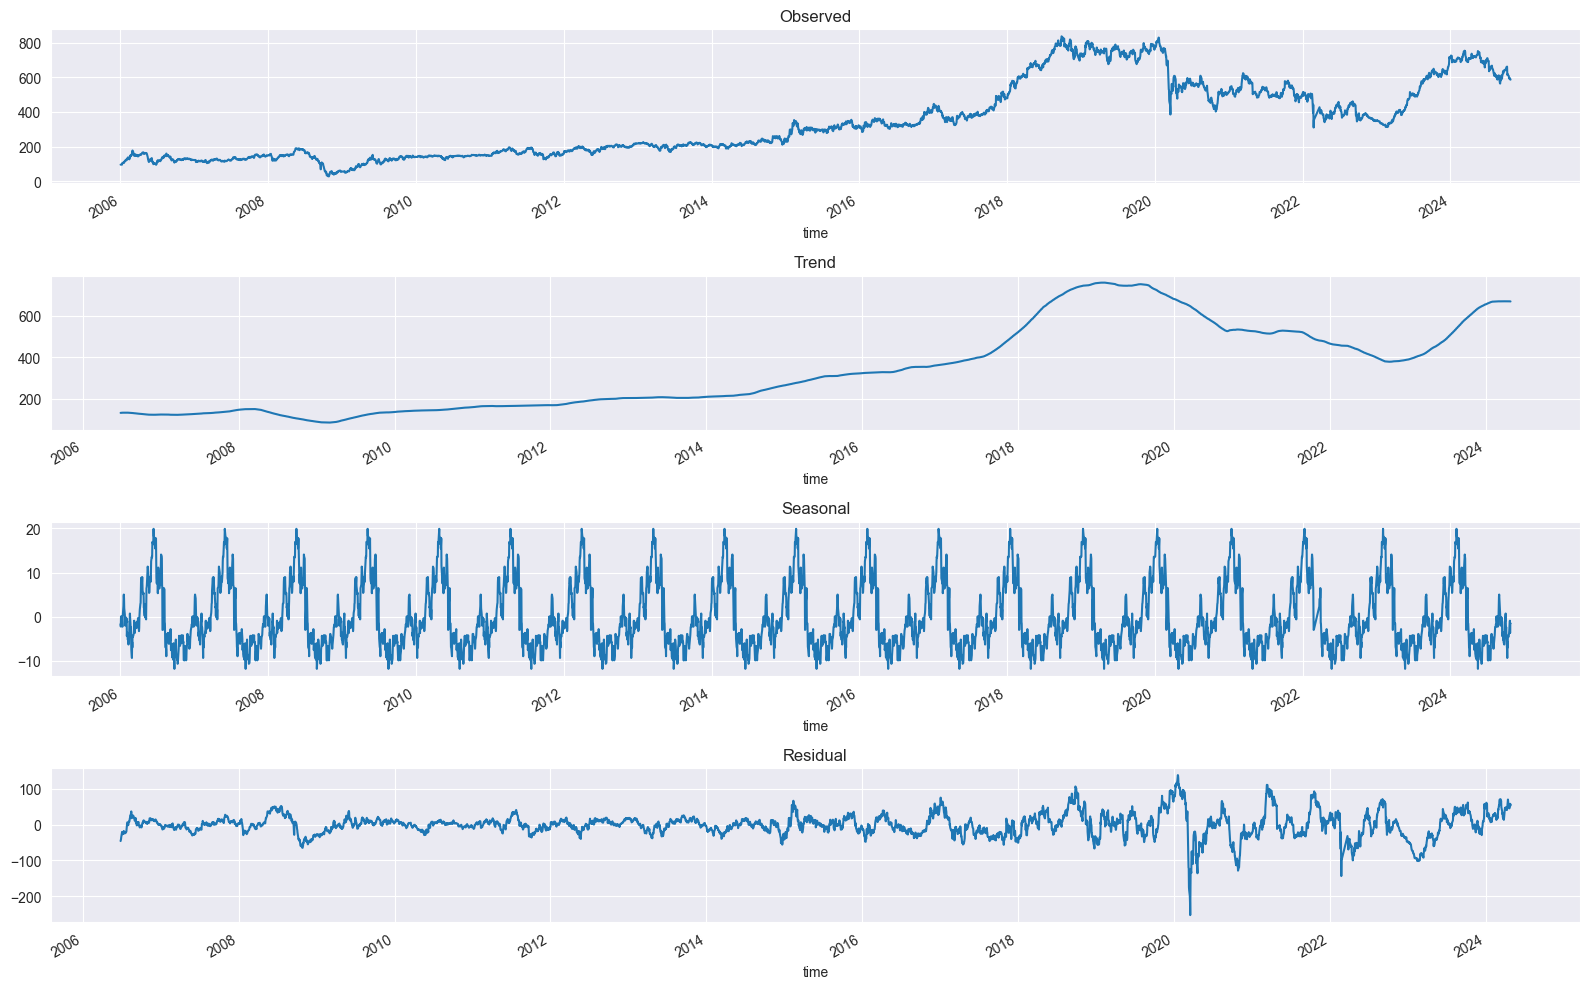

DickeyFuller Test:
ADF Statistic: -1.1280248649664741
p-value: 0.7037675249576428
Critical Values: {'1%': np.float64(-3.43170996518798), '5%': np.float64(-2.8621409523584336), '10%': np.float64(-2.5670898885616915)}

KPSS Test:
KPSS Statistic: 8.7961728155522
p-value: 0.01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


C:\Users\leo\AppData\Local\Temp\ipykernel_19044\1362312364.py:27: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(TATN['close'].dropna())


In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss


result = seasonal_decompose(TATN['close'], period=252)  # 252 - количество торговых дней в году, расчет снизу


_, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(16, 10))

result.observed.plot(ax=ax1)
ax1.set_title('Observed')
result.trend.plot(ax=ax2)
ax2.set_title('Trend')
result.seasonal.plot(ax=ax3)
ax3.set_title('Seasonal')
result.resid.plot(ax=ax4)
ax4.set_title('Residual')
plt.tight_layout()
plt.show()

adf_result = adfuller(TATN['close'].dropna())
print("DickeyFuller Test:")
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
print("Critical Values:", adf_result[4])

kpss_result = kpss(TATN['close'].dropna())
print("\nKPSS Test:")
print(f"KPSS Statistic: {kpss_result[0]}")
print(f"p-value: {kpss_result[1]}")
print("Critical Values:", kpss_result[3])


Декомпозиция временного ряда котировок TATN показывает устойчивый долгосрочный рост цен до 2020 года, после которого следует спад и частичное восстановление, отражающее влияние крупных экономических событий. Сезонная составляющая стабильна, указывая на регулярные колебания, что полезно для краткосрочных прогнозов. Остаточные колебания демонстрируют значительную волатильность в некоторые периоды, что может быть связано с внешними непредсказуемыми факторами, требующими внимания при анализе.

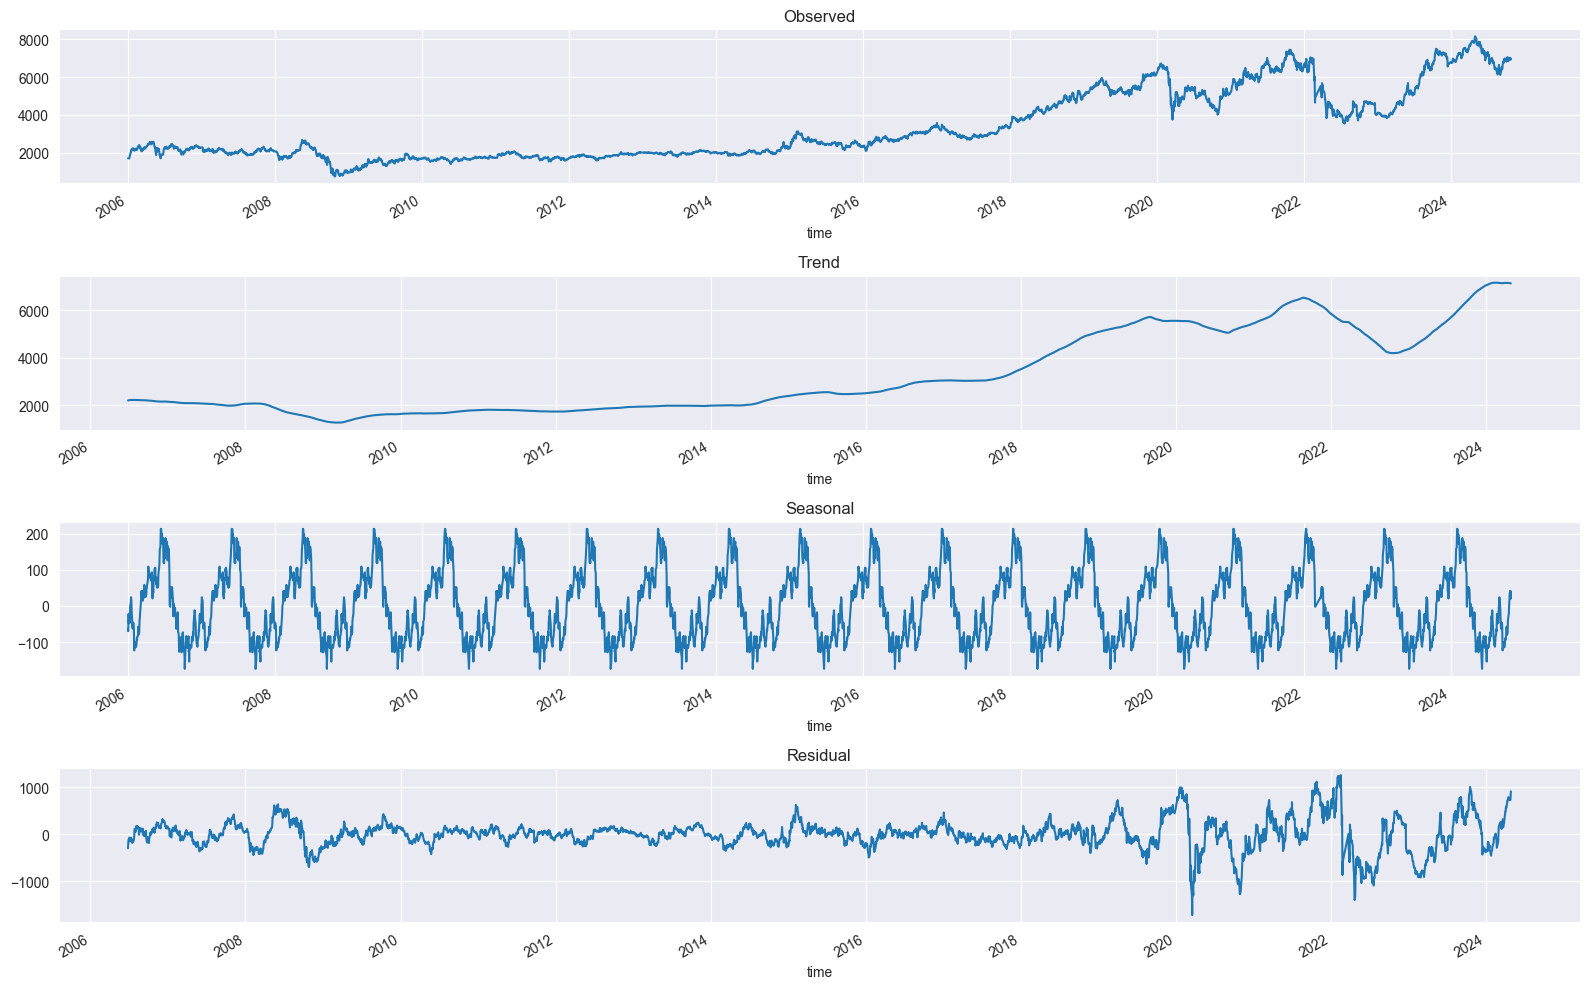

DickeyFuller Test:
ADF Statistic: -0.7306051279794212
p-value: 0.8386620743483189
Critical Values: {'1%': np.float64(-3.4317102480761292), '5%': np.float64(-2.862141077334742), '10%': np.float64(-2.5670899550918262)}

KPSS Test:
KPSS Statistic: 9.068576161695693
p-value: 0.01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


C:\Users\leo\AppData\Local\Temp\ipykernel_19044\1211283256.py:27: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(LKOH['close'].dropna())


In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss


result = seasonal_decompose(LKOH['close'], period=252)  # 252 - количество торговых дней в году, расчет снизу


_, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(16, 10))

result.observed.plot(ax=ax1)
ax1.set_title('Observed')
result.trend.plot(ax=ax2)
ax2.set_title('Trend')
result.seasonal.plot(ax=ax3)
ax3.set_title('Seasonal')
result.resid.plot(ax=ax4)
ax4.set_title('Residual')
plt.tight_layout()
plt.show()

adf_result = adfuller(LKOH['close'].dropna())
print("DickeyFuller Test:")
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
print("Critical Values:", adf_result[4])

kpss_result = kpss(LKOH['close'].dropna())
print("\nKPSS Test:")
print(f"KPSS Statistic: {kpss_result[0]}")
print(f"p-value: {kpss_result[1]}")
print("Critical Values:", kpss_result[3])


Декомпозиция временного ряда котировок LKOH показывает устойчивый долгосрочный рост цен, который временно замедляется в периоды экономической нестабильности, а затем продолжается. Сезонная составляющая демонстрирует регулярные и предсказуемые колебания, указывая на сильные сезонные эффекты, вероятно, связанные с циклической природой бизнеса компании или глобальными нефтяными рынками. Остаточная компонента указывает на значительные колебания в периоды кризисов, таких как финансовые потрясения или важные новости, что подчеркивает чувствительность акций к внешним событиям.

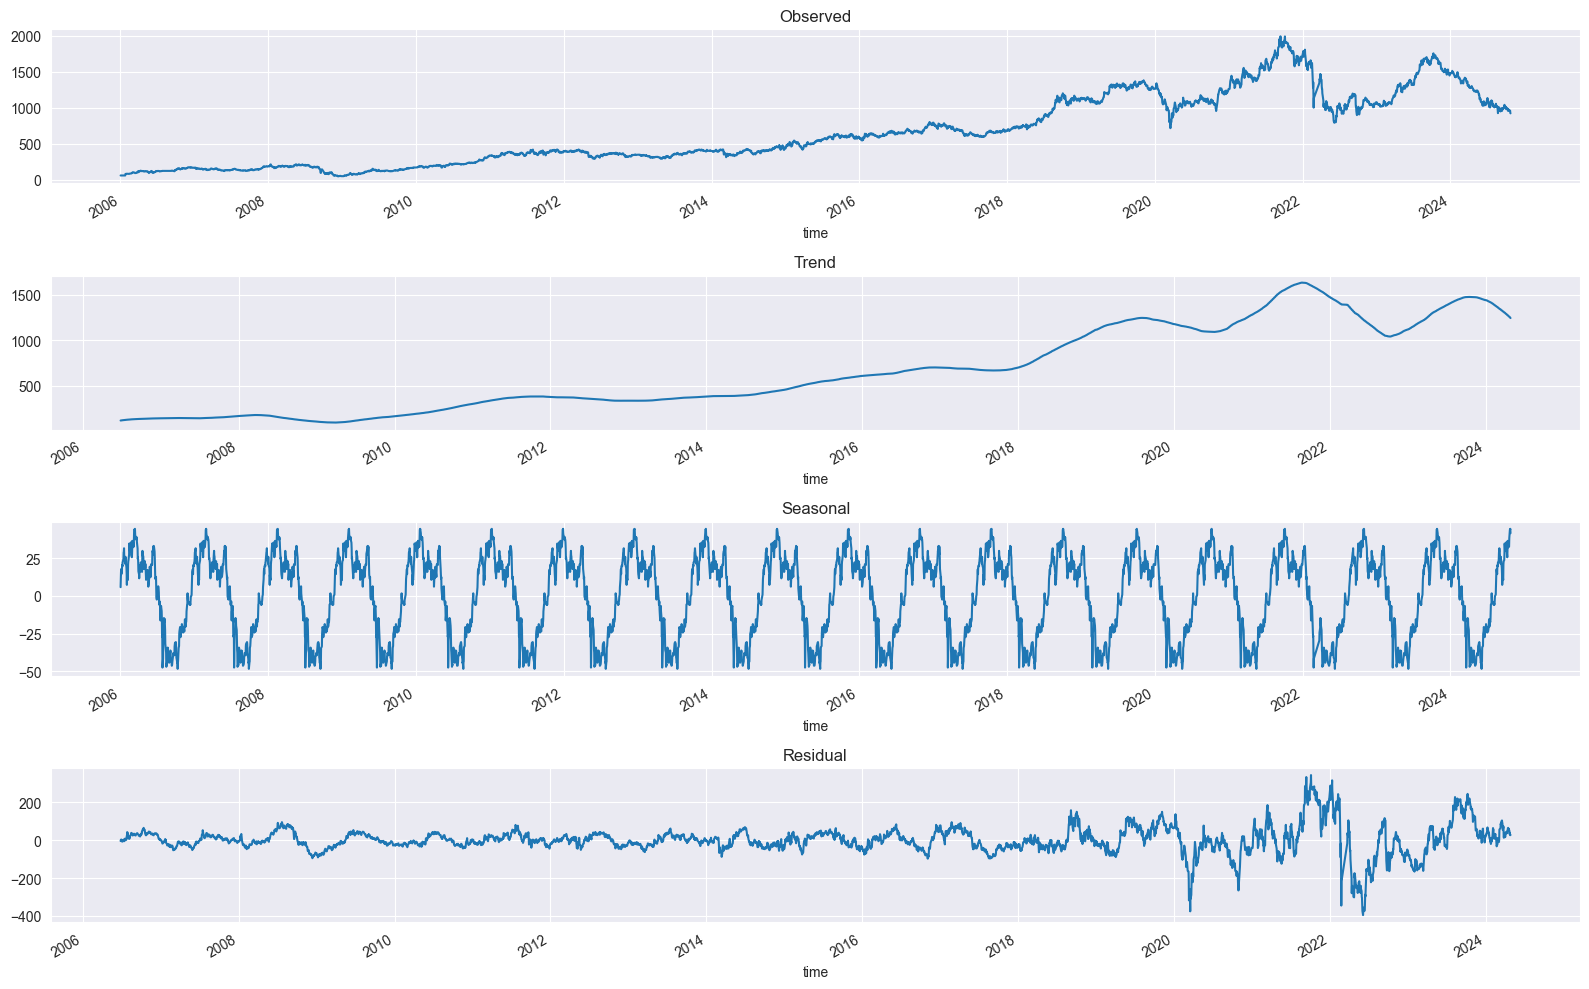

DickeyFuller Test:
ADF Statistic: -1.446526865265199
p-value: 0.5597786801884678
Critical Values: {'1%': np.float64(-3.4317102480761292), '5%': np.float64(-2.862141077334742), '10%': np.float64(-2.5670899550918262)}

KPSS Test:
KPSS Statistic: 10.018009307048162
p-value: 0.01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


C:\Users\leo\AppData\Local\Temp\ipykernel_19044\1663687506.py:27: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(NVTK['close'].dropna())


In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss


result = seasonal_decompose(NVTK['close'], period=252)  # 252 - количество торговых дней в году, расчет снизу


_, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(16, 10))

result.observed.plot(ax=ax1)
ax1.set_title('Observed')
result.trend.plot(ax=ax2)
ax2.set_title('Trend')
result.seasonal.plot(ax=ax3)
ax3.set_title('Seasonal')
result.resid.plot(ax=ax4)
ax4.set_title('Residual')
plt.tight_layout()
plt.show()

adf_result = adfuller(NVTK['close'].dropna())
print("DickeyFuller Test:")
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
print("Critical Values:", adf_result[4])

kpss_result = kpss(NVTK['close'].dropna())
print("\nKPSS Test:")
print(f"KPSS Statistic: {kpss_result[0]}")
print(f"p-value: {kpss_result[1]}")
print("Critical Values:", kpss_result[3])


Декомпозиция котировок NVTK показывает устойчивый долгосрочный рост с выраженным трендом, который замедляется и корректируется в последние годы, вероятно, в ответ на значимые экономические события. Сезонная компонента демонстрирует четкие и регулярные колебания, указывая на предсказуемые сезонные влияния. Остаточная составляющая показывает повышенную волатильность в определенные периоды, что может быть связано с краткосрочными внешними факторами, такими как рыночные шоки или новости.

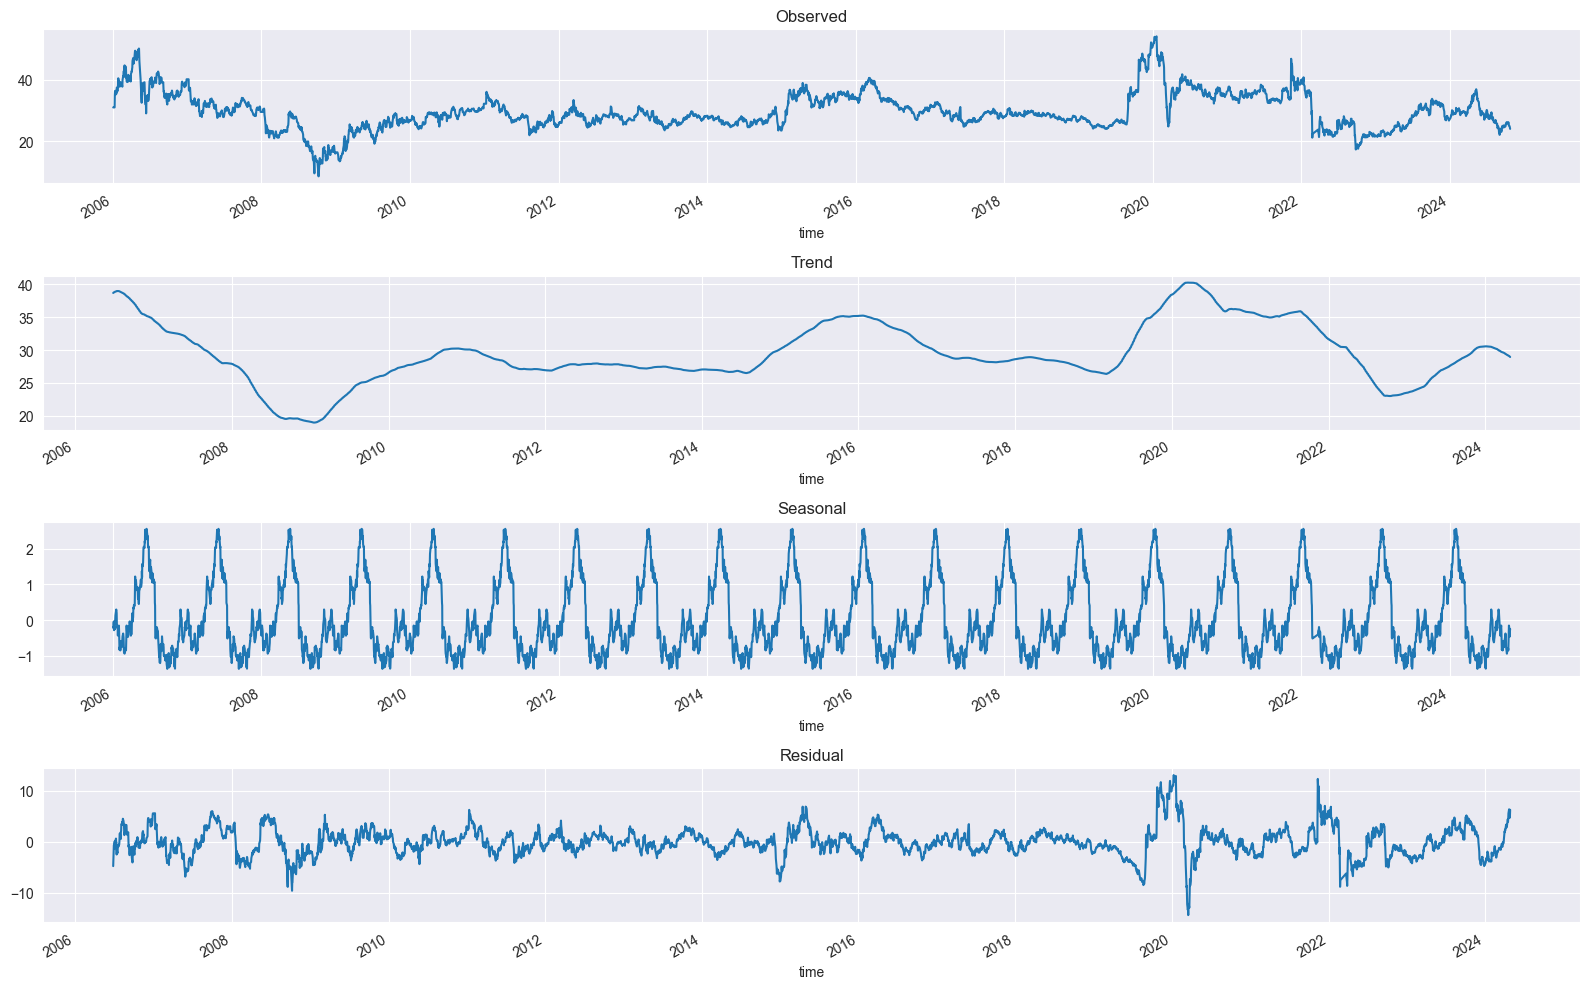

DickeyFuller Test:
ADF Statistic: -4.343998565707911
p-value: 0.000372415244366879
Critical Values: {'1%': np.float64(-3.4317026511738518), '5%': np.float64(-2.862137721117907), '10%': np.float64(-2.567088168437432)}

KPSS Test:
KPSS Statistic: 0.5752014980661148
p-value: 0.024890772903080473
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss


result = seasonal_decompose(SNGS['close'], period=252)  # 252 - количество торговых дней в году, расчет снизу


_, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(16, 10))

result.observed.plot(ax=ax1)
ax1.set_title('Observed')
result.trend.plot(ax=ax2)
ax2.set_title('Trend')
result.seasonal.plot(ax=ax3)
ax3.set_title('Seasonal')
result.resid.plot(ax=ax4)
ax4.set_title('Residual')
plt.tight_layout()
plt.show()

adf_result = adfuller(SNGS['close'].dropna())
print("DickeyFuller Test:")
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
print("Critical Values:", adf_result[4])

kpss_result = kpss(SNGS['close'].dropna())
print("\nKPSS Test:")
print(f"KPSS Statistic: {kpss_result[0]}")
print(f"p-value: {kpss_result[1]}")
print("Critical Values:", kpss_result[3])


Декомпозиция котировок SNGS показывает долгосрочный нисходящий тренд до 2009 года, после чего наблюдается период относительной стабильности вплоть до 2014 года. Затем начинается умеренное восстановление, сопровождаемое колебаниями. Сезонная компонента демонстрирует четкие и регулярные циклы, что свидетельствует о значимых сезонных влияниях, характерных для отрасли. Остаточная компонента указывает на повышенную волатильность в периоды кризисов и неожиданных событий, что подчеркивает уязвимость акций к внешним факторам и рыночным потрясениям.

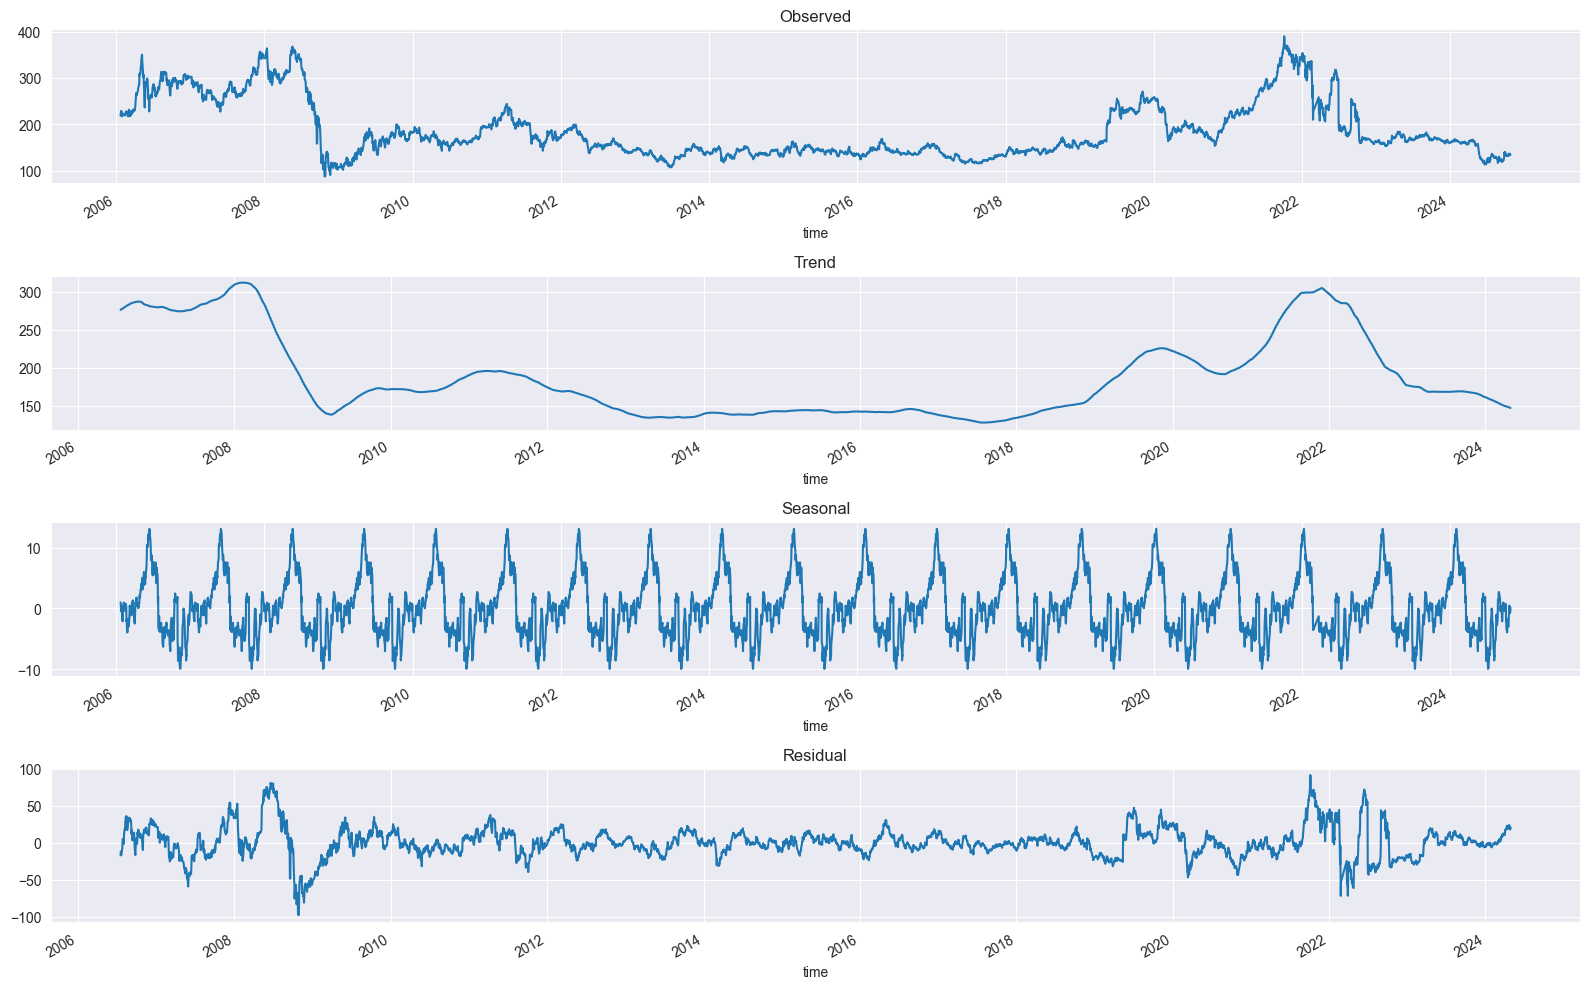

DickeyFuller Test:
ADF Statistic: -2.7816915534158646
p-value: 0.060936964604077146
Critical Values: {'1%': np.float64(-3.431713367630984), '5%': np.float64(-2.862142455512755), '10%': np.float64(-2.567090688753965)}

KPSS Test:
KPSS Statistic: 1.5579382795420402
p-value: 0.01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


C:\Users\leo\AppData\Local\Temp\ipykernel_19044\315043597.py:27: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(GAZP['close'].dropna())


In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss


result = seasonal_decompose(GAZP['close'], period=252)  # 252 - количество торговых дней в году, расчет снизу


_, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(16, 10))

result.observed.plot(ax=ax1)
ax1.set_title('Observed')
result.trend.plot(ax=ax2)
ax2.set_title('Trend')
result.seasonal.plot(ax=ax3)
ax3.set_title('Seasonal')
result.resid.plot(ax=ax4)
ax4.set_title('Residual')
plt.tight_layout()
plt.show()

adf_result = adfuller(GAZP['close'].dropna())
print("DickeyFuller Test:")
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
print("Critical Values:", adf_result[4])

kpss_result = kpss(GAZP['close'].dropna())
print("\nKPSS Test:")
print(f"KPSS Statistic: {kpss_result[0]}")
print(f"p-value: {kpss_result[1]}")
print("Critical Values:", kpss_result[3])


Анализ временного ряда котировок GAZP показывает выраженный нисходящий тренд в период финансового кризиса 2008-2009 годов, после чего наблюдается долгий период стабилизации с умеренным восстановлением и волатильностью. Тренд в последние годы отражает влияние значительных событий, таких как пандемия и колебания на энергетическом рынке. Сезонная компонента демонстрирует регулярные и предсказуемые колебания, что указывает на влияние сезонных факторов, характерных для компании и отрасли. Остаточная компонента выявляет значительную волатильность в периоды кризисов и других крупных экономических событий, что подчеркивает уязвимость акций GAZP к внешним шокам.

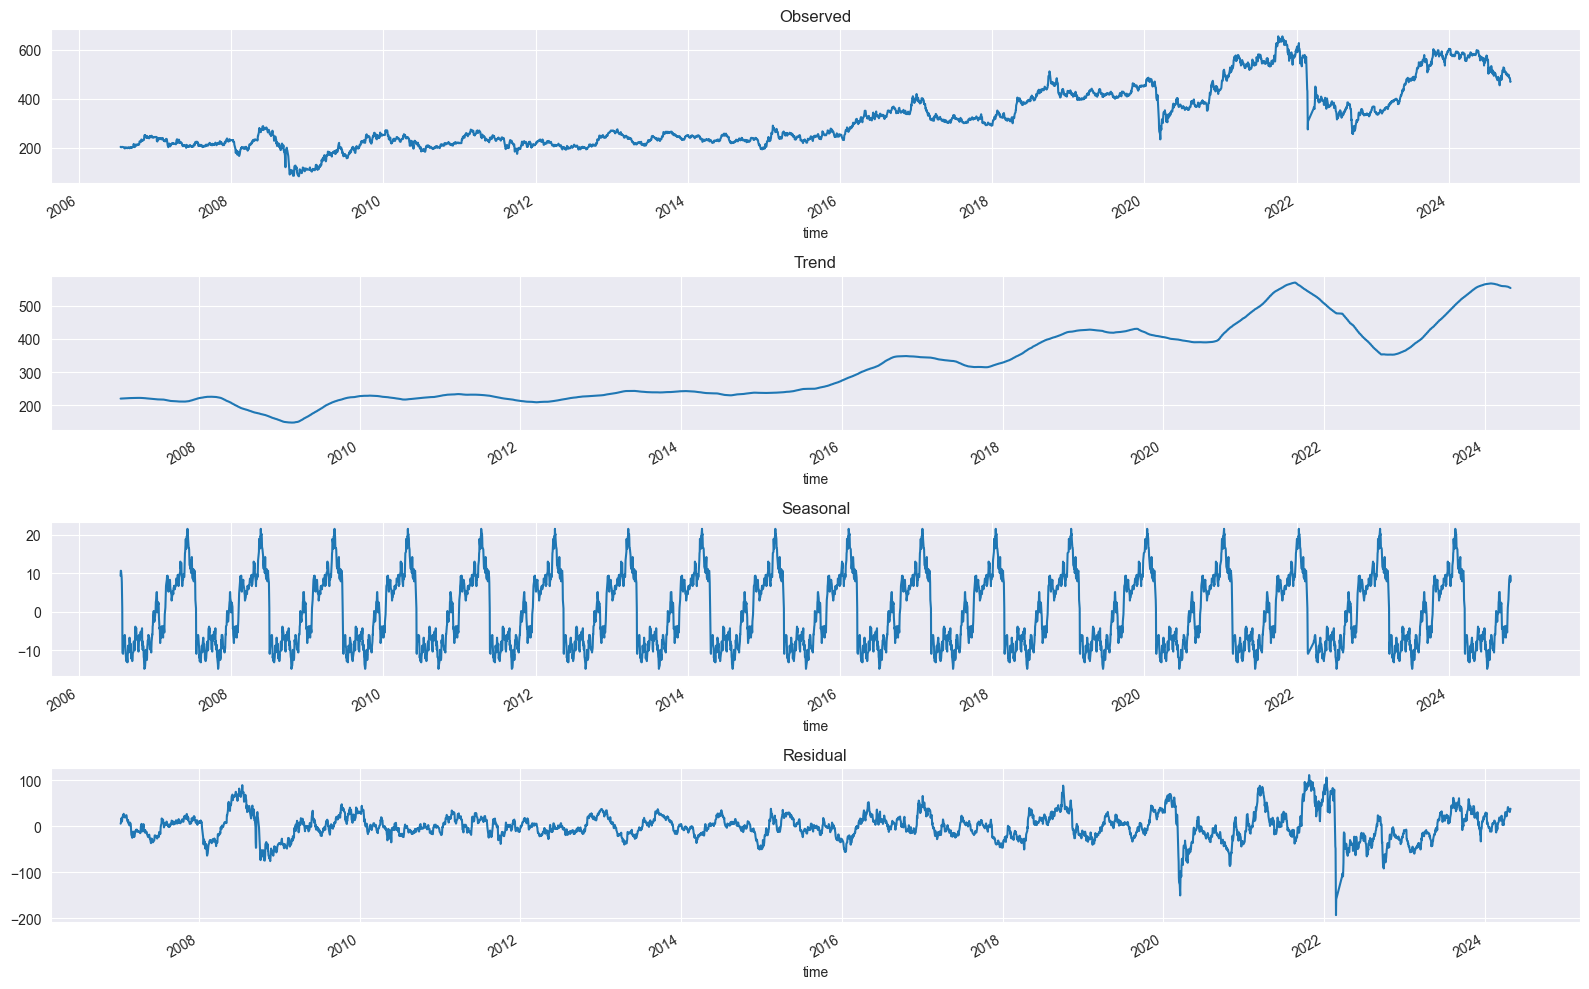

DickeyFuller Test:
ADF Statistic: -1.660724480918762
p-value: 0.45145346982046064
Critical Values: {'1%': np.float64(-3.431752250570597), '5%': np.float64(-2.862159633359289), '10%': np.float64(-2.5670998332650177)}

KPSS Test:
KPSS Statistic: 8.725724774602364
p-value: 0.01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


C:\Users\leo\AppData\Local\Temp\ipykernel_19044\94259502.py:27: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(ROSN['close'].dropna())


In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss


result = seasonal_decompose(ROSN['close'], period=252)  # 252 - количество торговых дней в году, расчет снизу


_, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(16, 10))

result.observed.plot(ax=ax1)
ax1.set_title('Observed')
result.trend.plot(ax=ax2)
ax2.set_title('Trend')
result.seasonal.plot(ax=ax3)
ax3.set_title('Seasonal')
result.resid.plot(ax=ax4)
ax4.set_title('Residual')
plt.tight_layout()
plt.show()

adf_result = adfuller(ROSN['close'].dropna())
print("DickeyFuller Test:")
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
print("Critical Values:", adf_result[4])

kpss_result = kpss(ROSN['close'].dropna())
print("\nKPSS Test:")
print(f"KPSS Statistic: {kpss_result[0]}")
print(f"p-value: {kpss_result[1]}")
print("Critical Values:", kpss_result[3])


Декомпозиция котировок ROSN показывает относительно стабильный тренд с умеренным ростом начиная с 2015 года, сопровождаемый волатильностью в последние годы, что, вероятно, связано с колебаниями на нефтяных рынках. Сезонная составляющая отчетливо выражена, указывая на регулярные циклические изменения, связанные с характером нефтяного бизнеса. Остаточная компонента демонстрирует повышенную волатильность в периоды глобальных экономических потрясений, что подчеркивает чувствительность акций к изменениям в мировых экономических условиях.

Функция заимствована отсюда https://github.com/madby31/moex_trade_dates

Посчитаем среднее кол-во торговых дней в году на бирже MOEX

In [41]:
from datetime import timedelta, date
from dateutil.parser import parse
white_list = [
    '2024-01-01', '2024-01-02', '2024-02-23','2024-03-08', '2024-05-01','2024-05-09', '2024-06-12','2024-11-04',
    '2023-01-02', '2023-02-23', '2023-03-08', '2023-05-01', '2023-05-09', '2023-06-12',
    '2022-03-07', '2022-03-08', '2022-05-02', '2022-05-03', '2022-05-09', '2022-05-10', '2022-06-13', '2022-11-04',
    '2021-01-01', '2021-01-07', '2021-02-23', '2021-03-08', '2021-05-03', '2021-05-10', '2021-06-14', '2021-11-04','2021-12-31',
    '2020-01-01', '2020-01-02', '2020-01-07', '2020-02-24', '2020-03-09', '2020-05-01', '2020-05-11', '2020-06-12', '2020-06-24','2020-07-01', '2020-11-04','2020-12-31',
    '2019-01-01', '2019-01-02', '2019-01-07', '2019-03-08', '2019-05-01', '2019-05-09', '2019-06-12', '2019-11-04', '2019-12-31',
    '2018-01-01', '2018-01-02', '2018-01-08', '2018-03-08', '2018-05-01', '2018-05-09', '2018-06-12', '2018-11-05', '2018-12-31',
    '2017-01-02', '2017-02-23', '2017-03-08', '2017-05-01', '2017-05-08', '2017-05-09', '2017-06-12', '2017-11-06',
    '2016-01-01', '2016-01-07', '2016-01-08', '2016-02-23', '2016-03-08', '2016-05-02', '2016-05-03', '2016-03-09', '2016-06-13', '2016-11-04',
    '2015-01-01', '2015-01-02', '2015-01-07', '2015-02-23', '2015-03-09', '2015-05-01', '2015-05-04', '2015-05-11', '2015-06-12', '2015-11-04', '2015-12-31',
    '2014-01-01', '2014-01-02', '2014-01-03', '2014-01-07', '2014-03-10', '2014-05-01', '2014-05-09', '2014-06-12', '2014-11-04', '2014-12-31',
    '2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04', '2013-01-07', '2013-03-08', '2013-05-01', '2013-05-09', '2013-06-12', '2013-11-04', '2013-12-31',
    '2012-01-02', '2012-02-23', '2012-03-08', '2012-03-09', '2012-04-30', '2012-05-01', '2012-05-09', '2012-06-11', '2012-06-12', '2012-11-05', '2012-12-31',
]
black_list = ['2024-12-28', '2024-11-02', '2024-04-27', '2021-02-20', '2018-06-09', '2018-12-29', '2016-02-20', '2012-03-11', '2012-04-28', '2012-05-05', '2012-05-12', '2012-06-09', ]
def check_date(day_check):
    if black_list.count(day_check.strftime('%Y-%m-%d')):
        return True
    if day_check.isoweekday() in [1,2,3,4,5] and not white_list.count(day_check.strftime('%Y-%m-%d')):
        return True
    else:
        return False
def func_moex_trade_dates(date_start=date.today(),days_to_subtract=10,mode=1):
    date_start = parse(str(date_start)).date()
    days_list = []
    n = 0
    while n < days_to_subtract:
        if check_date(date_start):
            days_list.insert(0, date_start.strftime("%Y-%m-%d"))
            n += 1
        date_start = date_start - timedelta(days=1)
    if mode == 1: # Returns a list of trading days from the date with the specified depth # Возвращает список  торговых дней от даты с  указанной глубиной
        return days_list
    elif mode == 2: # Returns the first day from the date with the specified depth # Возвращает первый день от даты с  указанной глубиной
        return days_list[0]
    elif mode == 3: # Returns the first day and the previous day from the date with the specified depth # Возвращает первый день и предыдущий день от даты с  указанной глубиной
        return [days_list[0],days_list[-2]]


In [43]:
from moex_trade_dates import func_moex_trade_dates
sum_periods = 0
for i in range(6):
    temp = 2024 - i
    period = 250
    year = func_moex_trade_dates(f'{temp}-01-01', period, 1)[0][:4]
    year_dist = str(temp - 1)
    while year == year_dist:
        period += 1
        year = func_moex_trade_dates(f'{temp}-01-01', period, 1)[0][:4]
    sum_periods += period - 1
print(sum_periods// 6)

252


Посчитали среднее кол-во торговых дней в году на бирже MOEX